In [137]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [138]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

To make it easier to visualize our potential clusters, we will reduce the data to 2 components using PCA.

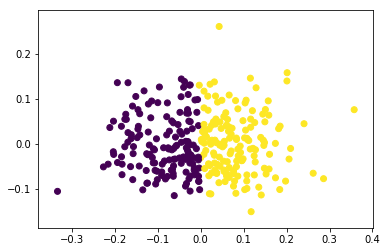

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99

accuracy: 60.4 %


In [139]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')

ct = pd.crosstab(y_pred, y)
print(ct)
print('\naccuracy:', round(np.sum(np.diagonal(ct))/(np.sum(ct.values)) *100, 2), '%')

Looks like this model isn't doing very well. We're correctly classifying 182 cases, but mis-classifying 120 of the cases!

Now let's try MiniBatch:

In [140]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      139    0
1       10  154


This marks a significant change. How substantial is the computational performance improvement? Try re-running the $k$-means and mini batch $k$-means models and timing their execution. Check out the [%timeit magic](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-timeit) for helpful timing tools.

In [141]:
%time

minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [142]:
%time
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

CPU times: user 32.7 ms, sys: 2.01 ms, total: 34.7 ms
Wall time: 34 ms


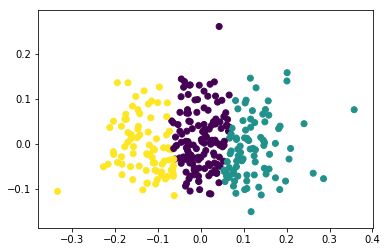

K-means for k=3

col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33

accuracy: 41.58 %

correct: 126

incorrect: 177


CPU times: user 10.3 ms, sys: 1.17 ms, total: 11.5 ms
Wall time: 10.8 ms
mini-batch for k=3


accuracy: 32.34 %

correct: 98

incorrect: 205
----------------------------------------------------------------------------------------------------


CPU times: user 48.6 ms, sys: 2.25 ms, total: 50.8 ms
Wall time: 49.6 ms


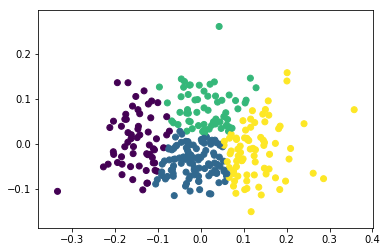

K-means for k=4

col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56

accuracy: 35.31 %

correct: 107

incorrect: 196


CPU times: user 12.3 ms, sys: 1.12 ms, total: 13.4 ms
Wall time: 12.5 ms
mini-batch for k=4


accuracy: 29.04 %

correct: 88

incorrect: 215
----------------------------------------------------------------------------------------------------


CPU times: user 30.4 ms, sys: 1.11 ms, total: 31.5 ms
Wall time: 30.9 ms


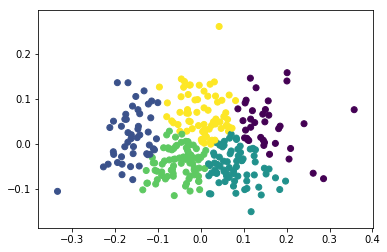

K-means for k=5

col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28

accuracy: 8.91 %

correct: 27

incorrect: 276


CPU times: user 15.5 ms, sys: 1.26 ms, total: 16.8 ms
Wall time: 16 ms
mini-batch for k=5


accuracy: 21.78 %

correct: 66

incorrect: 237
----------------------------------------------------------------------------------------------------


CPU times: user 35.5 ms, sys: 1.6 ms, total: 37.1 ms
Wall time: 36 ms


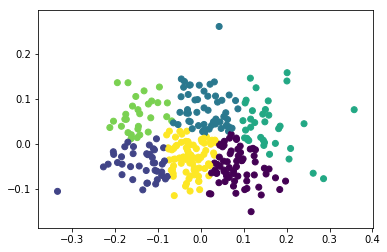

K-means for k=6

col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44

accuracy: 11.55 %

correct: 35

incorrect: 268


CPU times: user 12.3 ms, sys: 1.38 ms, total: 13.7 ms
Wall time: 12.7 ms
mini-batch for k=6


accuracy: 13.53 %

correct: 41

incorrect: 262
----------------------------------------------------------------------------------------------------


CPU times: user 39.2 ms, sys: 1.41 ms, total: 40.6 ms
Wall time: 39.8 ms


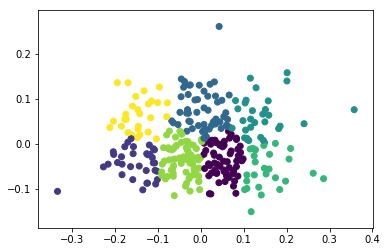

K-means for k=7

col_0   0   1
row_0        
0      14  48
1      19  15
2      34  20
3      16  15
4       3  23
5      31  37
6      22   6

accuracy: 9.57 %

correct: 29

incorrect: 274


CPU times: user 11.8 ms, sys: 1.36 ms, total: 13.2 ms
Wall time: 12.3 ms
mini-batch for k=7


accuracy: 14.19 %

correct: 43

incorrect: 260
----------------------------------------------------------------------------------------------------


CPU times: user 40.5 ms, sys: 1.67 ms, total: 42.2 ms
Wall time: 41.1 ms


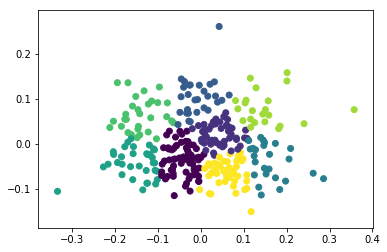

K-means for k=8

col_0   0   1
row_0        
0      32  35
1      22  29
2      17  12
3       5  20
4      19  15
5      24   6
6      12  10
7       8  37

accuracy: 20.13 %

correct: 61

incorrect: 242


CPU times: user 14.4 ms, sys: 1.29 ms, total: 15.7 ms
Wall time: 14.9 ms
mini-batch for k=8


accuracy: 10.89 %

correct: 33

incorrect: 270
----------------------------------------------------------------------------------------------------


CPU times: user 42.5 ms, sys: 1.42 ms, total: 43.9 ms
Wall time: 43 ms


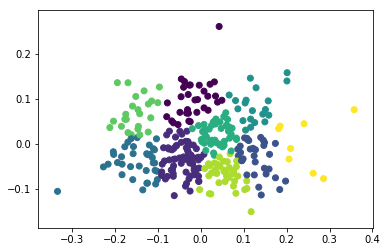

K-means for k=9

col_0   0   1
row_0        
0      19  13
1      32  35
2       8  24
3      20  16
4      13   7
5      20  25
6      20   4
7       6  33
8       1   7

accuracy: 17.82 %

correct: 54

incorrect: 249


CPU times: user 13.1 ms, sys: 1.34 ms, total: 14.5 ms
Wall time: 13.6 ms
mini-batch for k=9


accuracy: 5.61 %

correct: 17

incorrect: 286
----------------------------------------------------------------------------------------------------




In [143]:
for i in range(3,10):
    # Calculate predicted values.

    %time y_pred = KMeans(n_clusters=i, random_state=42).fit_predict(X_pca)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.show()

    # Check the solution against the data.
    print('K-means for k='+'{}'.format(i)+'\n')
    print(pd.crosstab(y_pred, y))
    ct = pd.crosstab(y_pred, y)
    print('\naccuracy:', round(np.sum(np.diagonal(ct))/(np.sum(ct.values)) *100, 2), '%')
    print('\ncorrect:', np.sum(np.diagonal(ct)))
    print('\nincorrect:', np.sum(ct.values)-np.sum(np.diagonal(ct)))
    
    # Each batch will be made up of 200 data points.
    minibatchkmeans = MiniBatchKMeans(
        init='random',
        n_clusters=i,
        batch_size=200)
    
    print('\n')
    %time minibatchkmeans.fit(X_pca)

    # Add the new predicted cluster memberships to the data frame.
    predict_mini = minibatchkmeans.predict(X_pca)

    # Check the MiniBatch model against our earlier one.
    print('mini-batch for k='+'{}'.format(i)+'\n')
    ct = pd.crosstab(predict_mini, y)
    print('\naccuracy:', round(np.sum(np.diagonal(ct))/(np.sum(ct.values)) *100, 2), '%')
    print('\ncorrect:', np.sum(np.diagonal(ct)))
    print('\nincorrect:', np.sum(ct.values)-np.sum(np.diagonal(ct)))
    print(100*'-')
    print('\n')

# As the number of clusters increases, the accuracy goes down and seems to stabalize for both methods